# Partie 2 : Explication de l'approche
L'approche consiste à créer une copie profonde du dataset original (df_processed) sur laquelle toutes les transformations seront appliquées. L'original (df) reste intact pour référence. À la fin, nous exportons le dataset transformé sous différents formats.

## Importation des bibliothèques

In [218]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


In [219]:
# Chargement et sauvegarde du dataset original
print("=== CHARGEMENT DES DONNÉES ===")

# Chargement du dataset original
df_original = pd.read_csv('hellowork_offres_complete.csv')

# Création d'une COPIE pour le traitement
df = df_original.copy()

print(f"Taille du dataset : {df.shape}")
print(f"{df.shape[0]} lignes et {df.shape[1]} colonnes")
print(f"Dataset original sauvegardé dans 'df_original'")
print(f"Copie de traitement créée : 'df'")

=== CHARGEMENT DES DONNÉES ===
Taille du dataset : (5409, 14)
5409 lignes et 14 colonnes
Dataset original sauvegardé dans 'df_original'
Copie de traitement créée : 'df'


## Analyse exploratoire

In [220]:
# 1. ANALYSE EXPLORATOIRE INITIALE
print("\n=== ANALYSE EXPLORATOIRE ===")

# Informations générales
print("1. Informations sur les colonnes :")
print(df.info())



=== ANALYSE EXPLORATOIRE ===
1. Informations sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5409 entries, 0 to 5408
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   page          5409 non-null   int64 
 1   offre_id      5409 non-null   int64 
 2   titre         5409 non-null   object
 3   entreprise    5409 non-null   object
 4   localisation  5409 non-null   object
 5   contrat       5409 non-null   object
 6   salaire       2908 non-null   object
 7   date          5409 non-null   object
 8   url_page      5409 non-null   object
 9   scraped_at    5409 non-null   object
 10  url           5409 non-null   object
 11  mots_cles     5409 non-null   object
 12  domaine       5380 non-null   object
 13  nombre_tags   5409 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 591.7+ KB
None


In [221]:
# Statistiques descriptives
print("\n2. Statistiques descriptives :")
display(df.describe(include='all').transpose())


2. Statistiques descriptives :


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
page,5409.0,NaN,NaN,NaN,104.980958,56.77035,1.0,59.0,106.0,154.0,200.0
offre_id,5409.0,NaN,NaN,NaN,71837750.385654,4414709.497545,17527156.0,72298016.0,73389576.0,73424128.0,73472840.0
titre,5409,3677,Collaborateur Comptable H/F,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entreprise,5409,827,B-Hive,288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
localisation,5409,1583,Lyon - 69,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contrat,5409,1,CDI,5409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salaire,2908,815,40 000 - 45 000 € / an,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,5409,22,il y a 1 jour,2747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
url_page,5409,200,https://www.hellowork.com/fr-fr/emploi/recherc...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scraped_at,5409,205,2025-12-06 15:35:15,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN



3. VALEURS MANQUANTES PAR COLONNE :
                   Valeurs_manquantes  Pourcentage
salaire                          2501    46.237752
salaire_normalise                2501    46.237752


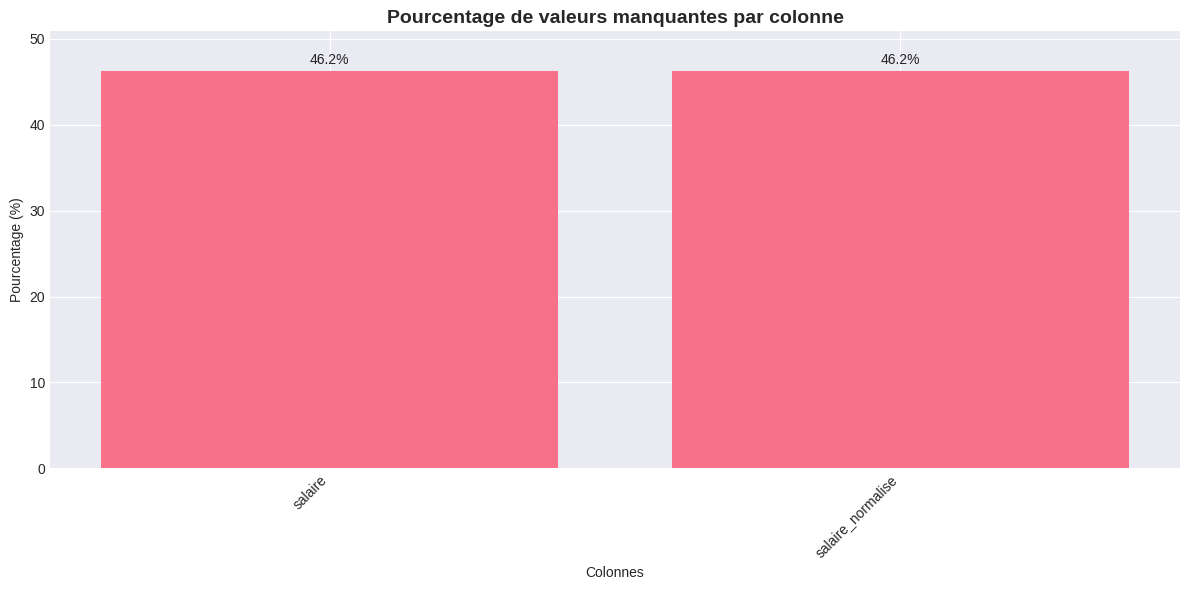

In [235]:
# Valeurs manquantes
print("\n3. VALEURS MANQUANTES PAR COLONNE :")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Valeurs_manquantes': missing_data,
    'Pourcentage': missing_percentage
})
missing_df = missing_df[missing_df['Valeurs_manquantes'] > 0].sort_values('Pourcentage', ascending=False)
print(missing_df)

# Visualisation des valeurs manquantes
plt.figure(figsize=(12, 6))
bars = plt.bar(missing_df.index, missing_df['Pourcentage'])
plt.title('Pourcentage de valeurs manquantes par colonne', fontsize=14, fontweight='bold')
plt.xlabel('Colonnes')
plt.ylabel('Pourcentage (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(missing_df['Pourcentage']) * 1.1)

# Ajout des pourcentages sur les barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
    f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [223]:
display(df)

,page,offre_id,titre,entreprise,localisation,contrat,salaire,date,url_page,scraped_at,url,mots_cles,domaine,nombre_tags
0,1,73452413,Employé de Ménage-Repassage - à Domicile - - S...,O2,Saint-Martin-d'Hères - 38,CDI,"11,91 € / heure",il y a 20 heures,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 15:35:15,https://www.hellowork.com/fr-fr/emplois/734524...,"Saint-Martin-d'Hères - 38, CDI, Temps partiel,...",Services aux Personnes,9
1,2,73438755,Technico-Commercial Itinérant H/F,Roussely,Évreux - 27,CDI,NaN,il y a 23 heures,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 15:35:17,https://www.hellowork.com/fr-fr/emplois/734387...,"Évreux - 27, CDI, Bac +2, Bac +3, Bac +4, Dist...",Distribution,8
2,2,73438741,Technico-Commercial Itinérant H/F,Roussely,Chartres - 28,CDI,NaN,il y a 23 heures,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 15:35:17,https://www.hellowork.com/fr-fr/emplois/734387...,"Chartres - 28, CDI, Bac +2, Bac +3, Bac +4, Di...",Distribution,8
3,2,73438342,Conseiller de Vente - Clisson 44 H/F,Pallard,Clisson - 44,CDI,NaN,il y a 1 jour,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 15:35:17,https://www.hellowork.com/fr-fr/emplois/734383...,"Clisson - 44, CDI, Bac, BTP, Distribution • Co...",Distribution,8
4,2,73438322,Chargé d'Affaires Cnd Nord H/F,ALPHA,Rouen - 76,CDI,35 000 - 45 000 € / an,il y a 1 jour,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 15:35:17,https://www.hellowork.com/fr-fr/emplois/734383...,"Rouen - 76, CDI, Télétravail partiel, Bac +2, ...",Industrie Manufacturière,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,199,71136507,Chargé d'Opérations H/F,OPH de la Meuse,Bar-le-Duc - 55,CDI,3 100 - 3 500 € / mois,il y a 2 jours,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 19:20:00,https://www.hellowork.com/fr-fr/emplois/711365...,"Bar-le-Duc - 55, CDI, Bac +5, Services aux Per...",Services aux Personnes,7
5405,199,71130852,Dessinateur Projeteur H/F,SOLUTIONS COMPETENCES,Poitiers - 86,CDI,2 599 - 2 600 € / mois,il y a 2 jours,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 19:20:00,https://www.hellowork.com/fr-fr/emplois/711308...,"Poitiers - 86, CDI, Bac +2, Services aux Entre...",Services aux Entreprises,7
5406,199,71135657,Responsable de Magasin 36H - CDI Temps Plein H/F,Naturalia France,Paris 9e - 75,CDI,NaN,il y a 2 jours,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 19:20:00,https://www.hellowork.com/fr-fr/emplois/711356...,"Paris 9e - 75, CDI, Bac +2, Bac +3, Bac +4, Di...",Distribution,8
5407,199,71131527,Manager de Rayons Frais ou Pgc H/F,Auchan Retail France,Paris - 75,CDI,32 000 - 40 000 € / an,il y a 2 jours,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 19:20:00,https://www.hellowork.com/fr-fr/emplois/711315...,"Paris - 75, CDI, Bac, Bac +2, Distribution • C...",Distribution,8


## Création de la colonne région

In [224]:
import re

def extract_city(location):
    # Cherche le pattern "Nom de ville - code postal"
    match = re.match(r'^(.+?) - \d+', str(location))
    if match:
        return match.group(1).strip()
    # Si pas de pattern correspondant, retourne la valeur originale
    return str(location).strip()

df['region'] = df['localisation'].apply(extract_city)

## Normalisation de la colonne salaire

In [225]:
# 2. TRANSFORMATION DES SALAIRES (création nouvelle colonne)
print("\n=== TRANSFORMATION DES SALAIRES ===")

import re

def normalize_salary(salary_str):
    if pd.isna(salary_str):
        return np.nan

    s = str(salary_str).strip()

    # 1. NETTOYAGE : remplacer tous les caractères spéciaux
    # Espaces insécables ( , &nbsp;, etc.)
    s = s.replace(' ', ' ').replace('\xa0', ' ').replace('\u202f', ' ')
    # Tiret spécial → tiret normal
    s = s.replace('–', '-').replace('—', '-')

    # 2. EXTRACTION des nombres
    # Trouver tous les nombres (avec virgules/décimales)
    numbers = re.findall(r'[\d\s,.]+', s)  # Ajout du point dans la regex

    if not numbers:
        return np.nan

    # Nettoyer chaque nombre
    clean_numbers = []
    for n in numbers:
        # Supprimer les espaces
        n = n.replace(' ', '')
        # Convertir virgule en point pour les décimales
        n = n.replace(',', '.')
        # Si plusieurs points, garder seulement le dernier (pour décimales)
        if n.count('.') > 1:
            parts = n.split('.')
            n = ''.join(parts[:-1]) + '.' + parts[-1]
        # Convertir en float seulement si le string n'est pas vide après nettoyage
        if n:
            try:
                clean_numbers.append(float(n))
            except ValueError:
                continue

    if not clean_numbers:
        return np.nan

    # 3. CALCUL selon l'unité
    s_lower = str(salary_str).lower()  # Utiliser l'original pour la détection

    # Heure → Mensuel (35h/sem × 4.33 sem/mois)
    if 'heure' in s_lower:
        return round(clean_numbers[0] * 35 * 4.33, 2)

    # Annuel → Mensuel (/12)
    elif 'an' in s_lower:
        if len(clean_numbers) == 2:
            moyenne = (clean_numbers[0] + clean_numbers[1]) / 2
        else:
            moyenne = clean_numbers[0]
        return round(moyenne / 12, 2)

    # Mensuel → Moyenne si plage
    elif 'mois' in s_lower:
        if len(clean_numbers) == 2:
            return round((clean_numbers[0] + clean_numbers[1]) / 2, 2)
        else:
            return round(clean_numbers[0], 2)

    # Si aucune unité détectée mais nombre > 1000, assumer annuel
    elif clean_numbers[0] > 1000:
        return round(clean_numbers[0] / 12, 2)

    return np.nan


# Application de la transformation - NOUVELLE COLONNE
print("Transformation des salaires en cours...")
# Sauvegarde de la valeur originale d'abord
df['salaire_normalise'] = df['salaire'].apply(normalize_salary)


=== TRANSFORMATION DES SALAIRES ===
Transformation des salaires en cours...


In [226]:
# Vérification des transformations
print(f"\nExemples de transformation :")
samples = df[['salaire', 'salaire_normalise']].head().fillna('N/A')
for i, (orig, norm) in enumerate(zip(samples['salaire'], samples['salaire_normalise'])):
      print(f"{i+1}. {orig} → {norm} €/mois")

# Statistiques des salaires normalisés
print("\nStatistiques des salaires normalisés :")
print(f"Moyenne : {df['salaire_normalise'].mean():.2f} €")
print(f"Médiane : {df['salaire_normalise'].median():.2f} €")
print(f"Écart-type : {df['salaire_normalise'].std():.2f} €")
print(f"Valeurs manquantes : {df['salaire_normalise'].isna().sum()}")


Exemples de transformation :
1. 11,91 € / heure → 1804.96 €/mois
2. N/A → N/A €/mois
3. N/A → N/A €/mois
4. N/A → N/A €/mois
5. 35 000 - 45 000 € / an → 3333.33 €/mois

Statistiques des salaires normalisés :
Moyenne : 2842.43 €
Médiane : 2625.00 €
Écart-type : 1056.99 €
Valeurs manquantes : 2501


In [227]:
display(df)

,page,offre_id,titre,entreprise,localisation,contrat,salaire,date,url_page,scraped_at,url,mots_cles,domaine,nombre_tags,region,salaire_normalise
0,1,73452413,Employé de Ménage-Repassage - à Domicile - - S...,O2,Saint-Martin-d'Hères - 38,CDI,"11,91 € / heure",il y a 20 heures,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 15:35:15,https://www.hellowork.com/fr-fr/emplois/734524...,"Saint-Martin-d'Hères - 38, CDI, Temps partiel,...",Services aux Personnes,9,Saint-Martin-d'Hères,1804.96
1,2,73438755,Technico-Commercial Itinérant H/F,Roussely,Évreux - 27,CDI,NaN,il y a 23 heures,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 15:35:17,https://www.hellowork.com/fr-fr/emplois/734387...,"Évreux - 27, CDI, Bac +2, Bac +3, Bac +4, Dist...",Distribution,8,Évreux,NaN
2,2,73438741,Technico-Commercial Itinérant H/F,Roussely,Chartres - 28,CDI,NaN,il y a 23 heures,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 15:35:17,https://www.hellowork.com/fr-fr/emplois/734387...,"Chartres - 28, CDI, Bac +2, Bac +3, Bac +4, Di...",Distribution,8,Chartres,NaN
3,2,73438342,Conseiller de Vente - Clisson 44 H/F,Pallard,Clisson - 44,CDI,NaN,il y a 1 jour,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 15:35:17,https://www.hellowork.com/fr-fr/emplois/734383...,"Clisson - 44, CDI, Bac, BTP, Distribution • Co...",Distribution,8,Clisson,NaN
4,2,73438322,Chargé d'Affaires Cnd Nord H/F,ALPHA,Rouen - 76,CDI,35 000 - 45 000 € / an,il y a 1 jour,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 15:35:17,https://www.hellowork.com/fr-fr/emplois/734383...,"Rouen - 76, CDI, Télétravail partiel, Bac +2, ...",Industrie Manufacturière,8,Rouen,3333.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,199,71136507,Chargé d'Opérations H/F,OPH de la Meuse,Bar-le-Duc - 55,CDI,3 100 - 3 500 € / mois,il y a 2 jours,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 19:20:00,https://www.hellowork.com/fr-fr/emplois/711365...,"Bar-le-Duc - 55, CDI, Bac +5, Services aux Per...",Services aux Personnes,7,Bar-le-Duc,3300.00
5405,199,71130852,Dessinateur Projeteur H/F,SOLUTIONS COMPETENCES,Poitiers - 86,CDI,2 599 - 2 600 € / mois,il y a 2 jours,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 19:20:00,https://www.hellowork.com/fr-fr/emplois/711308...,"Poitiers - 86, CDI, Bac +2, Services aux Entre...",Services aux Entreprises,7,Poitiers,2599.50
5406,199,71135657,Responsable de Magasin 36H - CDI Temps Plein H/F,Naturalia France,Paris 9e - 75,CDI,NaN,il y a 2 jours,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 19:20:00,https://www.hellowork.com/fr-fr/emplois/711356...,"Paris 9e - 75, CDI, Bac +2, Bac +3, Bac +4, Di...",Distribution,8,Paris 9e,NaN
5407,199,71131527,Manager de Rayons Frais ou Pgc H/F,Auchan Retail France,Paris - 75,CDI,32 000 - 40 000 € / an,il y a 2 jours,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 19:20:00,https://www.hellowork.com/fr-fr/emplois/711315...,"Paris - 75, CDI, Bac, Bac +2, Distribution • C...",Distribution,8,Paris,3000.00


## Analyse des corrélations


=== ANALYSE DES CORRÉLATIONS ===

Dataset après l'encodage numérique:



,page,offre_id,titre,entreprise,localisation,contrat,salaire,date,url_page,scraped_at,url,mots_cles,domaine,nombre_tags,salaire_original,salaire_normalise
0,1,73452413,1780,544,1251,0,"11,91 € / heure",11,0,0,5177,3824,32,9,47,1804.96
1,2,73438755,3547,627,1577,0,NaN,14,111,1,4830,4718,7,8,815,NaN
2,2,73438741,3547,627,302,0,NaN,14,111,1,4829,893,7,8,815,NaN
3,2,73438342,1400,569,351,0,NaN,1,111,1,4825,1038,7,8,815,NaN
4,2,73438322,514,20,1170,0,35 000 - 45 000 € / an,1,111,1,4819,3615,17,8,646,3333.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,199,71136507,564,549,110,0,3 100 - 3 500 € / mois,10,110,203,911,329,32,7,702,3300.00
5405,199,71130852,1571,650,1091,0,2 599 - 2 600 € / mois,10,110,203,893,3325,31,7,531,2599.50
5406,199,71135657,3078,530,1049,0,NaN,10,110,203,910,3223,7,8,815,NaN
5407,199,71131527,2516,85,1030,0,32 000 - 40 000 € / an,10,110,203,895,3102,7,8,605,3000.00


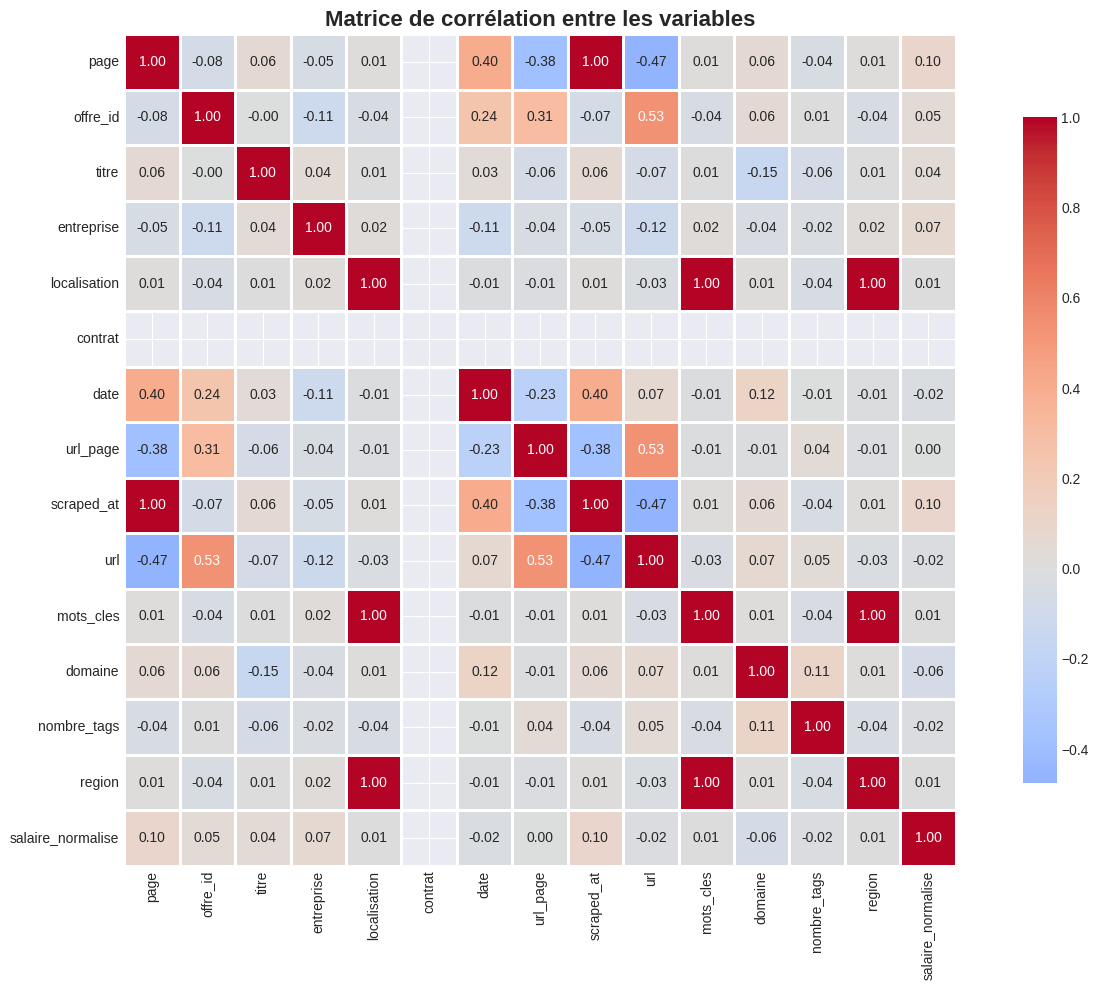


Top 10 des corrélations avec le salaire normalisé :
salaire_normalise    1.000000
scraped_at           0.097603
page                 0.097136
entreprise           0.071688
offre_id             0.047948
titre                0.040511
localisation         0.007105
region               0.007102
mots_cles            0.005735
url_page             0.003219
Name: salaire_normalise, dtype: float64


In [228]:
# 3. ANALYSE DES CORRÉLATIONS
print("\n=== ANALYSE DES CORRÉLATIONS ===")

# Préparation pour corrélation (copie pour encodage)
df_corr = df.copy()

# Encodage des variables catégorielles pour corrélation
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df_corr.select_dtypes(include=['object']).columns:
    if col not in ['salaire', 'salaire_original']:  # On évite les colonnes de salaire texte
        try:
            le = LabelEncoder()
            df_corr[col] = le.fit_transform(df_corr[col].astype(str).fillna('NaN'))
            label_encoders[col] = le
        except:
            pass
# Dataset encodé
print("\nDataset après l\'encodage numérique:\n")
display(df_encoded)

# Matrice de corrélation
correlation_matrix = df_corr.select_dtypes(include=[np.number]).corr()

# Visualisation
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Matrice de corrélation entre les variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# Corrélations avec le salaire
if 'salaire_normalise' in correlation_matrix.columns:
    salary_corr = correlation_matrix['salaire_normalise'].sort_values(ascending=False)
    print("\nTop 10 des corrélations avec le salaire normalisé :")
    print(salary_corr.head(10))



=== IMPUTATION DES VALEURS MANQUANTES ===
Salaire moyen par domaine et région (top 10) :


,domaine,region,salaire_moyen,salaire_median,nombre_observations
1850,Secteur informatique,Lyon,3730.262632,3541.670,38
2315,Services aux Entreprises,Saint-Thurial,2156.930345,2180.000,29
1806,Secteur informatique,Grenoble,3511.904762,3541.670,21
1844,Secteur informatique,Limonest,3806.373529,3958.330,17
2253,Services aux Entreprises,Paris,3245.971250,2354.165,16
1966,Secteur informatique,Strasbourg,2858.655333,2916.670,15
1885,Secteur informatique,Nantes,3199.403571,3291.665,14
1843,Secteur informatique,Lille,3848.213571,3958.330,14
1974,Secteur informatique,Toulouse,3312.500714,3145.835,14
1700,Secteur informatique,Aix-en-Provence,3839.743846,3541.670,13


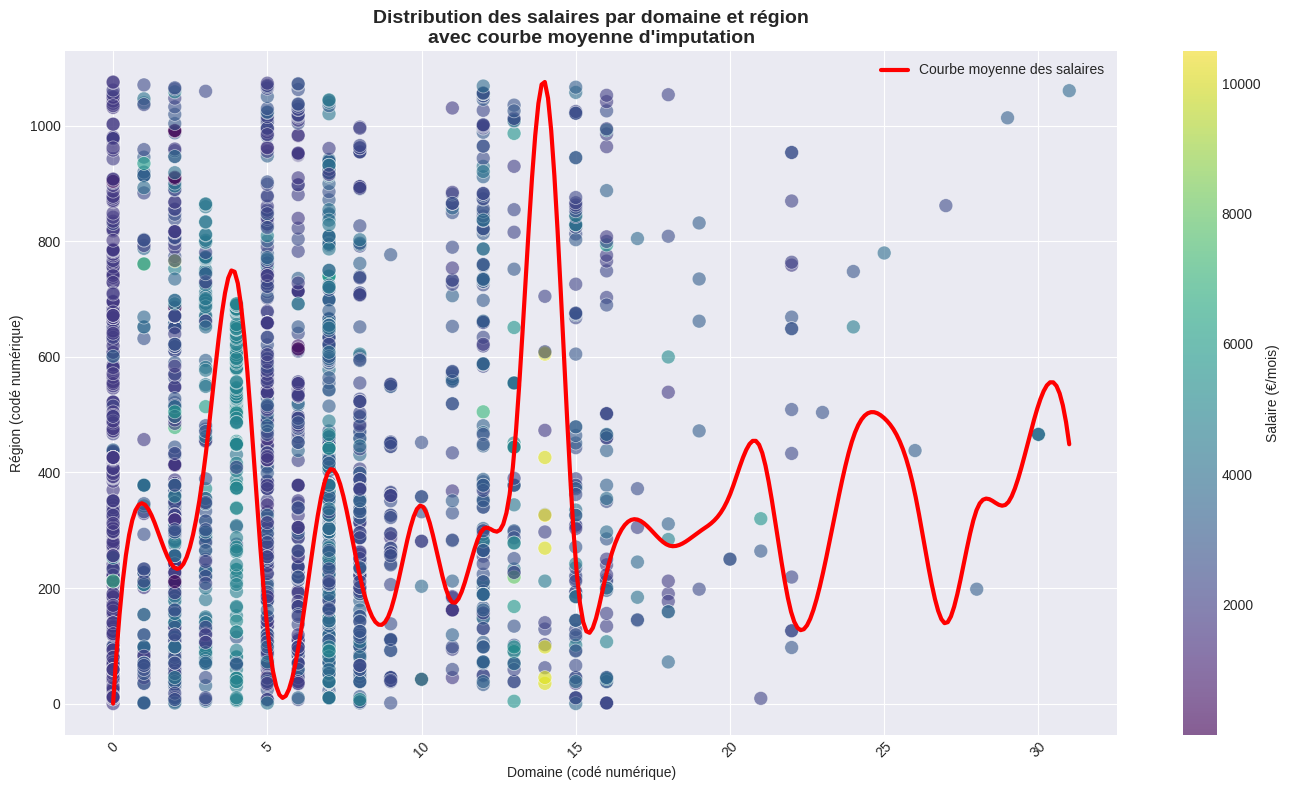

In [229]:
# 4. IMPUTATION DES VALEURS MANQUANTES - APPROCHE AVANCÉE
print("\n=== IMPUTATION DES VALEURS MANQUANTES ===")

# Création d'une NOUVELLE COLONNE pour le salaire imputé
df['salaire_impute'] = df['salaire_normalise'].copy()

# Stratégie d'imputation basée sur domaine et région
if all(col in df.columns for col in ['domaine', 'region', 'salaire_normalise']):

    # Calcul du salaire moyen par domaine et région
    salary_by_domain_region = df.groupby(['domaine', 'region'])['salaire_normalise'].agg(['mean', 'median', 'count']).reset_index()
    salary_by_domain_region.columns = ['domaine', 'region', 'salaire_moyen', 'salaire_median', 'nombre_observations']

    print("Salaire moyen par domaine et région (top 10) :")
    display(salary_by_domain_region.sort_values('nombre_observations', ascending=False).head(10))

    # Visualisation : Nuage de points avec courbe moyenne
    plt.figure(figsize=(14, 8))

    # Préparation des données pour la visualisation
    df_vis = df.dropna(subset=['domaine', 'region', 'salaire_normalise'])

    if not df_vis.empty:
        # Création d'un code numérique pour les domaines
        domain_codes = {domain: i for i, domain in enumerate(df_vis['domaine'].unique())}
        df_vis['domaine_code'] = df_vis['domaine'].map(domain_codes)

        # Encodage numérique des régions pour l'axe Y
        region_codes = {region: i for i, region in enumerate(df_vis['region'].unique())}
        df_vis['region_code'] = df_vis['region'].map(region_codes)

        # Scatter plot
        scatter = plt.scatter(df_vis['domaine_code'], df_vis['region_code'],
                            c=df_vis['salaire_normalise'], cmap='viridis',
                            s=100, alpha=0.6, edgecolors='w', linewidth=0.5)

        # Calcul et tracé de la courbe moyenne
        if len(df_vis['domaine_code'].unique()) > 3:
            # Moyenne par domaine
            mean_salary_by_domain = df_vis.groupby('domaine_code')['salaire_normalise'].mean().reset_index()
            mean_salary_by_domain = mean_salary_by_domain.sort_values('domaine_code')

            # Interpolation pour une courbe lisse
            if len(mean_salary_by_domain) > 3:
                x_smooth = np.linspace(mean_salary_by_domain['domaine_code'].min(),
                                    mean_salary_by_domain['domaine_code'].max(), 300)
                spl = make_interp_spline(mean_salary_by_domain['domaine_code'],
                                        mean_salary_by_domain['salaire_normalise'], k=3)
                y_smooth = spl(x_smooth)

                # Normalisation pour l'affichage sur l'axe Y
                y_min, y_max = df_vis['region_code'].min(), df_vis['region_code'].max()
                y_smooth_normalized = y_min + (y_smooth - y_smooth.min()) * (y_max - y_min) / (y_smooth.max() - y_smooth.min())

                # Tracé de la courbe moyenne
                plt.plot(x_smooth, y_smooth_normalized, 'r-', linewidth=3, label='Courbe moyenne des salaires')

        plt.colorbar(scatter, label='Salaire (€/mois)')
        plt.title('Distribution des salaires par domaine et région\navec courbe moyenne d\'imputation',
                fontsize=14, fontweight='bold')
        plt.xlabel('Domaine (codé numérique)')
        plt.ylabel('Région (codé numérique)')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Fonction d'imputation basée sur domaine et région
    def impute_salary(row):
        if pd.isna(row['salaire_normalise']) and not pd.isna(row['domaine']) and not pd.isna(row['region']):
            mask = (salary_by_domain_region['domaine'] == row['domaine']) & \
                   (salary_by_domain_region['region'] == row['region'])

            if not salary_by_domain_region[mask].empty and salary_by_domain_region[mask]['nombre_observations'].iloc[0] > 0:
                return salary_by_domain_region[mask]['salaire_median'].iloc[0]
            else:
                # Si pas de données pour cette combinaison, utiliser la moyenne du domaine
                domain_mask = salary_by_domain_region['domaine'] == row['domaine']
                if not salary_by_domain_region[domain_mask].empty and salary_by_domain_region[domain_mask]['nombre_observations'].sum() > 0:
                    return salary_by_domain_region[domain_mask]['salaire_median'].mean()

        return row['salaire_normalise']


=== IMPUTATION DES VALEURS MANQUANTES (Visualisation 3D) ===
Salaire moyen par domaine et région (top 10) :


,domaine,region,salaire_moyen,salaire_median,nombre_observations
1850,Secteur informatique,Lyon,3730.262632,3541.670,38
2315,Services aux Entreprises,Saint-Thurial,2156.930345,2180.000,29
1806,Secteur informatique,Grenoble,3511.904762,3541.670,21
1844,Secteur informatique,Limonest,3806.373529,3958.330,17
2253,Services aux Entreprises,Paris,3245.971250,2354.165,16
1966,Secteur informatique,Strasbourg,2858.655333,2916.670,15
1885,Secteur informatique,Nantes,3199.403571,3291.665,14
1843,Secteur informatique,Lille,3848.213571,3958.330,14
1974,Secteur informatique,Toulouse,3312.500714,3145.835,14
1700,Secteur informatique,Aix-en-Provence,3839.743846,3541.670,13


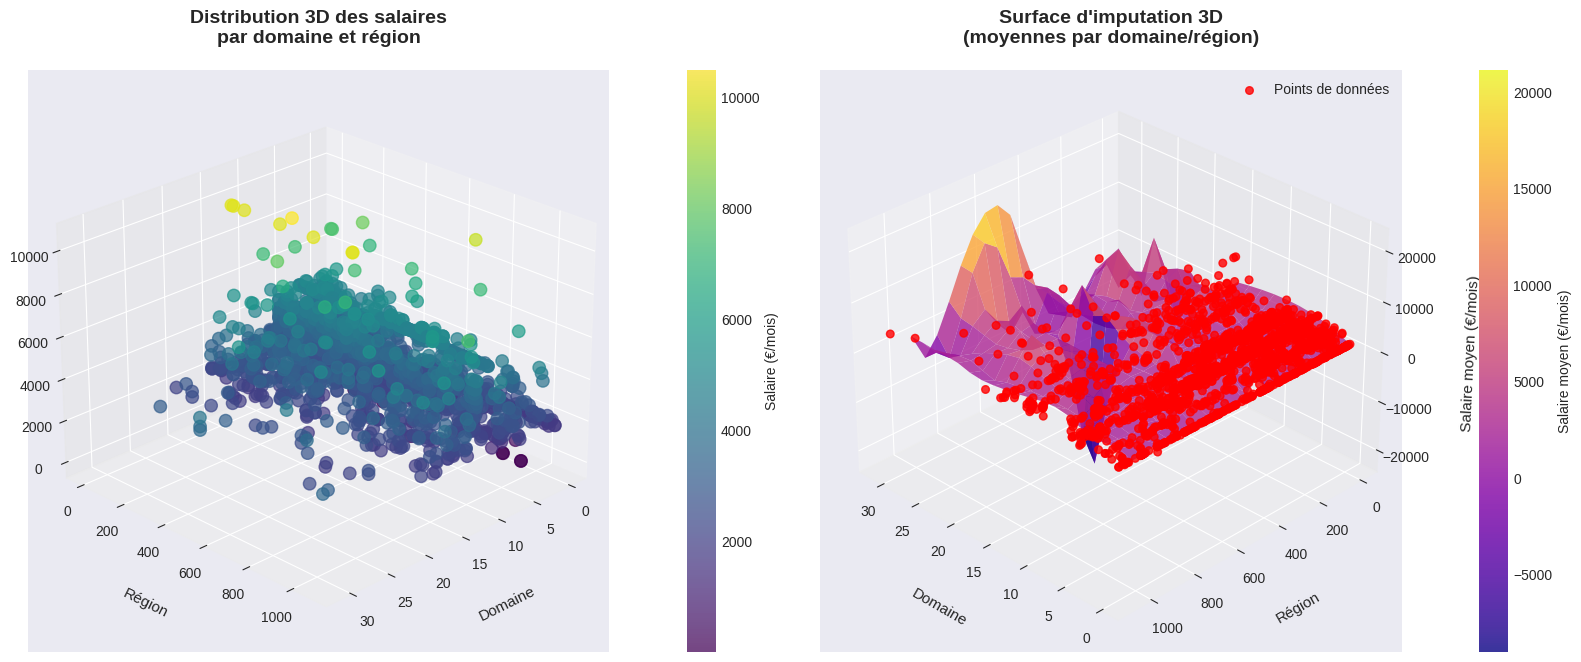


LÉGENDE DES CODES NUMÉRIQUES

Domaines (axe X):
    0: Services aux Personnes         (447 observations)
    1: Industrie Manufacturière       (78 observations)
    2: Services aux Entreprises       (341 observations)
    3: Banque                         (142 observations)
    4: Média                          (134 observations)
    5: Distribution                   (297 observations)
    6: Tourisme                       (182 observations)
    7: Secteur informatique           (591 observations)
    8: Industrie Auto                 (167 observations)
    9: Enseignement                   (74 observations)
   10: Santé                          (10 observations)
   11: Industrie Agro-alimentaire     (50 observations)
   12: Secteur Energie                (138 observations)
   13: Immobilier                     (50 observations)
   14: Service public hospitalier     (18 observations)
   15: BTP                            (74 observations)
   16: Transport                      (51 obse

In [230]:
# N'oubliez pas d'ajouter ces imports au début de votre script
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata, make_interp_spline

# 4. IMPUTATION DES VALEURS MANQUANTES - APPROCHE AVANCÉE 3D
print("\n=== IMPUTATION DES VALEURS MANQUANTES (Visualisation 3D) ===")

# Création d'une NOUVELLE COLONNE pour le salaire imputé
df['salaire_impute'] = df['salaire_normalise'].copy()

# Stratégie d'imputation basée sur domaine et région
if all(col in df.columns for col in ['domaine', 'region', 'salaire_normalise']):

    # Calcul du salaire moyen par domaine et région
    salary_by_domain_region = df.groupby(['domaine', 'region'])['salaire_normalise'].agg(['mean', 'median', 'count']).reset_index()
    salary_by_domain_region.columns = ['domaine', 'region', 'salaire_moyen', 'salaire_median', 'nombre_observations']

    print("Salaire moyen par domaine et région (top 10) :")
    display(salary_by_domain_region.sort_values('nombre_observations', ascending=False).head(10))

    # ================== VISUALISATION 3D ==================
    fig = plt.figure(figsize=(16, 10))

    # Préparation des données pour la visualisation 3D
    df_vis = df.dropna(subset=['domaine', 'region', 'salaire_normalise']).copy()

    if not df_vis.empty and len(df_vis) > 10:  # Vérifier qu'il y a assez de données
        # 1. Encodage numérique pour l'axe X (domaines)
        domains = df_vis['domaine'].unique()
        domain_to_code = {domain: i for i, domain in enumerate(domains)}
        df_vis['domaine_code'] = df_vis['domaine'].map(domain_to_code)

        # 2. Encodage numérique pour l'axe Y (régions)
        regions = df_vis['region'].unique()
        region_to_code = {region: i for i, region in enumerate(regions)}
        df_vis['region_code'] = df_vis['region'].map(region_to_code)

        # 3. Axe Z (salaire)
        salaries = df_vis['salaire_normalise']

        # Graphique 3D principal
        ax1 = fig.add_subplot(121, projection='3d')

        # Nuage de points 3D
        scatter = ax1.scatter3D(
            df_vis['domaine_code'],
            df_vis['region_code'],
            df_vis['salaire_normalise'],
            c=df_vis['salaire_normalise'],
            cmap='viridis',
            s=80,
            alpha=0.7,
            depthshade=True
        )

        # Configuration du graphique 3D
        ax1.set_xlabel('Domaine', labelpad=15, fontsize=11)
        ax1.set_ylabel('Région', labelpad=15, fontsize=11)
        ax1.set_zlabel('Salaire (€/mois)', labelpad=15, fontsize=11)
        ax1.set_title('Distribution 3D des salaires\npar domaine et région',
                     fontsize=14, fontweight='bold', pad=20)

        # Ajout d'une barre de couleur
        cbar = plt.colorbar(scatter, ax=ax1, shrink=0.6, pad=0.1)
        cbar.set_label('Salaire (€/mois)', fontsize=10)

        # Rotation pour meilleure vue
        ax1.view_init(elev=25, azim=45)

        # Ajout de grille
        ax1.grid(True, alpha=0.3)

        # Graphique 2: Surface d'imputation (moyennes par domaine/région)
        ax2 = fig.add_subplot(122, projection='3d')

        # Préparation de la surface
        X_surface = []
        Y_surface = []
        Z_surface = []

        # Récupération des moyennes pour chaque combinaison domaine/région
        for domain_code in df_vis['domaine_code'].unique():
            for region_code in df_vis['region_code'].unique():
                mask = (df_vis['domaine_code'] == domain_code) & (df_vis['region_code'] == region_code)
                if mask.any():
                    avg_salary = df_vis.loc[mask, 'salaire_normalise'].mean()
                    X_surface.append(domain_code)
                    Y_surface.append(region_code)
                    Z_surface.append(avg_salary)

        if len(X_surface) > 4:  # Besoin d'au moins 4 points pour l'interpolation cubique
            # Conversion en arrays numpy
            X_surface = np.array(X_surface)
            Y_surface = np.array(Y_surface)
            Z_surface = np.array(Z_surface)

            # Création d'une grille pour la surface
            xi = np.linspace(X_surface.min(), X_surface.max(), 20)
            yi = np.linspace(Y_surface.min(), Y_surface.max(), 20)
            xi, yi = np.meshgrid(xi, yi)

            # Interpolation pour créer une surface lisse
            # Utiliser 'linear' si 'cubic' échoue
            try:
                zi = griddata((X_surface, Y_surface), Z_surface, (xi, yi), method='cubic')
            except:
                zi = griddata((X_surface, Y_surface), Z_surface, (xi, yi), method='linear')

            # Tracé de la surface (uniquement si l'interpolation a réussi)
            if not np.isnan(zi).all():
                surf = ax2.plot_surface(xi, yi, zi, cmap='plasma',
                                       alpha=0.8, linewidth=0,
                                       antialiased=True)

            # Points d'origine
            ax2.scatter3D(X_surface, Y_surface, Z_surface,
                         color='red', s=30, alpha=0.8,
                         label='Points de données')

            # Configuration du graphique
            ax2.set_xlabel('Domaine', labelpad=15, fontsize=11)
            ax2.set_ylabel('Région', labelpad=15, fontsize=11)
            ax2.set_zlabel('Salaire moyen (€/mois)', labelpad=15, fontsize=11)
            ax2.set_title('Surface d\'imputation 3D\n(moyennes par domaine/région)',
                         fontsize=14, fontweight='bold', pad=20)

            # Ajout d'une barre de couleur pour la surface si elle existe
            if 'surf' in locals():
                cbar2 = plt.colorbar(surf, ax=ax2, shrink=0.6, pad=0.1)
                cbar2.set_label('Salaire moyen (€/mois)', fontsize=10)

            # Rotation pour meilleure vue
            ax2.view_init(elev=30, azim=135)

            # Légende
            ax2.legend(loc='upper right')
        else:
            ax2.text(0.5, 0.5, 0.5, "Pas assez de données\npour créer une surface 3D",
                    transform=ax2.transAxes, ha='center', va='center',
                    fontsize=12, bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))
            ax2.set_title('Surface d\'imputation 3D\n(données insuffisantes)',
                         fontsize=14, fontweight='bold', pad=20)

        plt.tight_layout()
        plt.show()

        # ================== LÉGENDES DÉTAILLÉES ==================
        print("\n" + "="*60)
        print("LÉGENDE DES CODES NUMÉRIQUES")
        print("="*60)

        print("\nDomaines (axe X):")
        for domain, code in sorted(domain_to_code.items(), key=lambda x: x[1]):
            count = (df_vis['domaine'] == domain).sum()
            print(f"  {code:3d}: {domain:<30} ({count} observations)")

        print("\nRégions (axe Y):")
        for region, code in sorted(region_to_code.items(), key=lambda x: x[1]):
            count = (df_vis['region'] == region).sum()
            print(f"  {code:3d}: {region:<25} ({count} observations)")
    else:
        print("Pas assez de données pour la visualisation 3D")
        print(f"  Observations disponibles: {len(df_vis)}")

    # Fonction d'imputation basée sur domaine et région
    def impute_salary(row):
        if pd.isna(row['salaire_normalise']) and not pd.isna(row['domaine']) and not pd.isna(row['region']):
            mask = (salary_by_domain_region['domaine'] == row['domaine']) & \
                   (salary_by_domain_region['region'] == row['region'])

            if not salary_by_domain_region[mask].empty and salary_by_domain_region[mask]['nombre_observations'].iloc[0] > 0:
                return salary_by_domain_region[mask]['salaire_median'].iloc[0]
            else:
                # Si pas de données pour cette combinaison, utiliser la moyenne du domaine
                domain_mask = salary_by_domain_region['domaine'] == row['domaine']
                if not salary_by_domain_region[domain_mask].empty and salary_by_domain_region[domain_mask]['nombre_observations'].sum() > 0:
                    return salary_by_domain_region[domain_mask]['salaire_median'].mean()

        return row['salaire_normalise']

    # Application de l'imputation
    print("\nImputation des salaires manquants...")
    df['salaire_impute'] = df.apply(impute_salary, axis=1)

    # Statistiques d'imputation
    imputed_count = df['salaire_normalise'].isna().sum() - df['salaire_impute'].isna().sum()
    print(f"\nRésumé de l'imputation :")
    print(f"- Salaires manquants avant : {df['salaire_normalise'].isna().sum()}")
    print(f"- Salaires manquants après : {df['salaire_impute'].isna().sum()}")
    print(f"- Salaires imputés : {imputed_count}")

    if imputed_count > 0:
        print(f"\nExemples de salaires imputés :")
        imputed_samples = df[df['salaire_normalise'].isna()].head(3)
        for idx, row in imputed_samples.iterrows():
            print(f"• Domaine: {row['domaine']}, Région: {row['region']} → {row['salaire_impute']:.2f} €/mois")
else:
    print("Colonnes 'domaine' et/ou 'region' non trouvées - imputation non effectuée")

In [231]:
# TRAITEMENT DES VALEURS MANQUANTES RESTANTES PAR LE MODE
print("\n=== TRAITEMENT DES VALEURS MANQUANTES RESTANTES ===")

# Identifier les valeurs manquantes
missing_count = df['salaire_impute'].isna().sum()
print(f"Valeurs manquantes à traiter : {missing_count}")

if missing_count > 0:
    # Calculer le mode (valeur la plus fréquente)
    mode_values = df['salaire_impute'].mode()

    if not mode_values.empty:
        mode_value = mode_values.iloc[0]
        print(f"Mode (valeur la plus fréquente) : {mode_value:.2f} €")
        print(f"Fréquence : {(df['salaire_impute'] == mode_value).sum()} occurrences")

        # Remplir les valeurs manquantes avec le mode
        df['salaire_impute'] = df['salaire_impute'].fillna(mode_value)

        # Mettre à jour la source si la colonne existe
        if 'imputation_source' in df.columns:
            df.loc[df['salaire_impute'].notna() & df['salaire_impute'].isna().shift(), 'imputation_source'] = f"Dernière imputation (mode: {mode_value:.0f}€)"

        print(f"\n{missing_count} valeurs manquantes remplies avec le mode")
        print(f"Taux de complétude : 100%")
    else:
        print("Impossible de calculer le mode - colonne vide")
else:
    print("Aucune valeur manquante à traiter")


=== TRAITEMENT DES VALEURS MANQUANTES RESTANTES ===
Valeurs manquantes à traiter : 30
Mode (valeur la plus fréquente) : 2921.47 €
Fréquence : 260 occurrences

30 valeurs manquantes remplies avec le mode
Taux de complétude : 100%


In [232]:
# TRAITEMENT COMPLET DES DOMAINES MANQUANTS
print("\n=== TRAITEMENT DES DOMAINES MANQUANTS ===")

if 'domaine' in df.columns:
    # Étape 1: Inférence par région (si disponible)
    if 'region' in df.columns and df['domaine'].isna().any():
        # Calculer le domaine le plus fréquent par région
        domaine_par_region = df.dropna(subset=['domaine', 'region'])\
                             .groupby('region')['domaine'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

        # Remplir les domaines manquants par région
        for idx, row in df[df['domaine'].isna()].iterrows():
            if pd.notna(row.get('region')) and row['region'] in domaine_par_region.index:
                df.at[idx, 'domaine'] = domaine_par_region[row['region']]

    # Étape 2: Remplir les restants avec le domaine le plus fréquent
    if df['domaine'].isna().any():
        mode_domaine = df['domaine'].mode()
        if not mode_domaine.empty:
            df['domaine'] = df['domaine'].fillna(mode_domaine.iloc[0])

    # Résultat final
    missing_final = df['domaine'].isna().sum()
    print(f"Domaines manquants restants : {missing_final}")
    print(f"Taux de complétude : {(1 - missing_final/len(df))*100:.2f}%")
else:
    print("Colonne 'domaine' non trouvée")


=== TRAITEMENT DES DOMAINES MANQUANTS ===
Domaines manquants restants : 0
Taux de complétude : 100.00%


## Analyse de la distribution

In [233]:
# 5. ANALYSE DES QUARTILES ET DISTRIBUTION
print("\n=== ANALYSE DES QUARTILES ET DISTRIBUTION ===")

# Sélection de la colonne de salaire à analyser
if 'salaire_impute' in df.columns and df['salaire_impute'].notna().any():
    salaire_col = 'salaire_impute'
    col_name = 'Salaire imputé'
elif 'salaire_normalise' in df.columns and df['salaire_normalise'].notna().any():
    salaire_col = 'salaire_normalise'
    col_name = 'Salaire normalisé'
else:
    salaire_col = None

# Calcul des quartiles
quartiles = df[salaire_col].quantile([0.25, 0.5, 0.75])
print(f"Quartiles des {col_name.lower()} :")
print(f"Q1 (25%) : {quartiles[0.25]:.2f} €")
print(f"Q2 (Médiane - 50%) : {quartiles[0.5]:.2f} €")
print(f"Q3 (75%) : {quartiles[0.75]:.2f} €")
print(f"IQR (Q3-Q1) : {quartiles[0.75] - quartiles[0.25]:.2f} €")
print(f"Moyenne : {df[salaire_col].mean():.2f} €")


=== ANALYSE DES QUARTILES ET DISTRIBUTION ===
Quartiles des salaire imputé :
Q1 (25%) : 2295.68 €
Q2 (Médiane - 50%) : 2758.35 €
Q3 (75%) : 3291.67 €
IQR (Q3-Q1) : 995.99 €
Moyenne : 2878.79 €


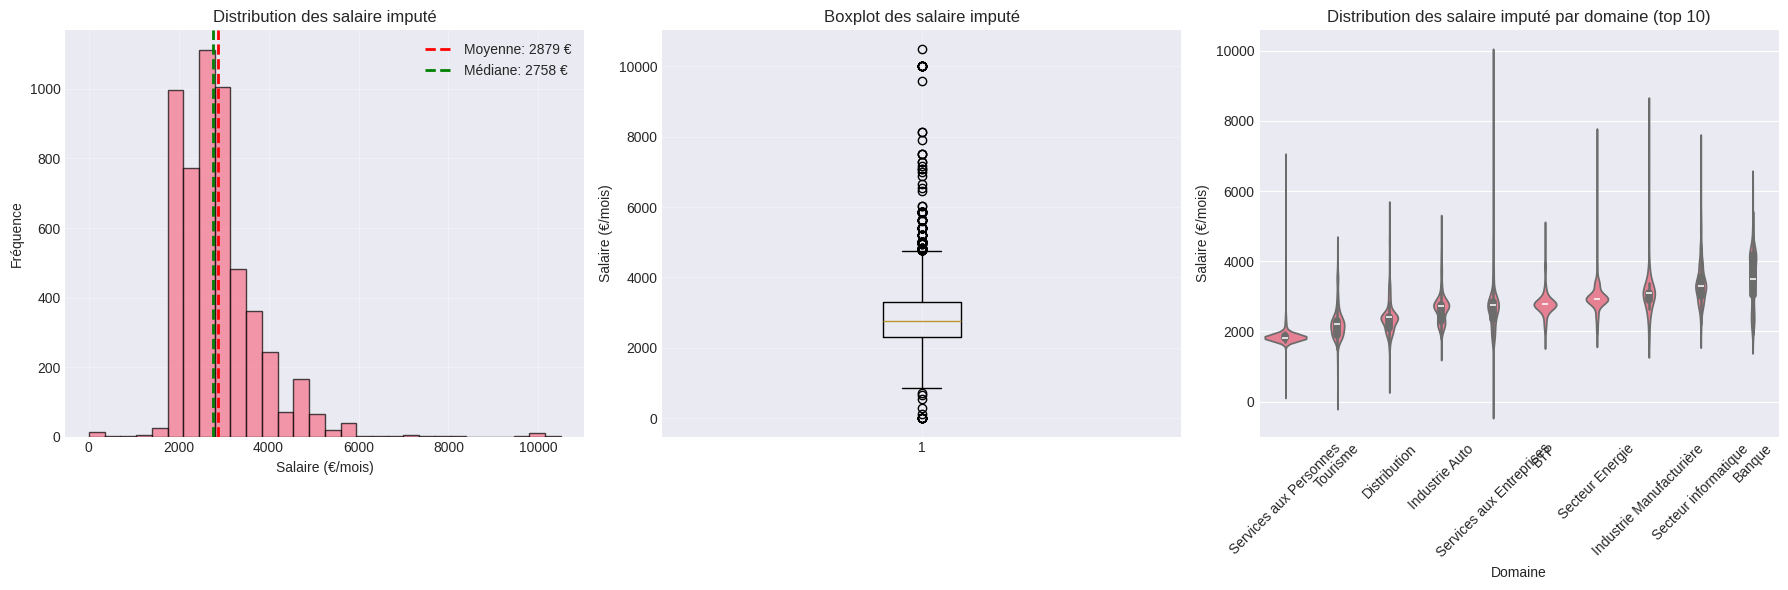

In [234]:
# Visualisation de la distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Histogramme
axes[0].hist(df[salaire_col].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(df[salaire_col].mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Moyenne: {df[salaire_col].mean():.0f} €')
axes[0].axvline(df[salaire_col].median(), color='green', linestyle='--', linewidth=2,
                  label=f'Médiane: {df[salaire_col].median():.0f} €')
axes[0].set_xlabel('Salaire (€/mois)')
axes[0].set_ylabel('Fréquence')
axes[0].set_title(f'Distribution des {col_name.lower()}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Boxplot
axes[1].boxplot(df[salaire_col].dropna())
axes[1].set_ylabel('Salaire (€/mois)')
axes[1].set_title(f'Boxplot des {col_name.lower()}')
axes[1].grid(True, alpha=0.3)

# 3. Violin plot par domaine (si disponible)
if 'domaine' in df.columns and df['domaine'].notna().any():
    # Prendre les 10 domaines les plus fréquents pour la lisibilité
    top_domains = df['domaine'].value_counts().head(10).index
    df_top = df[df['domaine'].isin(top_domains)]

    if not df_top.empty:
        # Trier par salaire médian
        domain_order = df_top.groupby('domaine')[salaire_col].median().sort_values().index

        sns.violinplot(data=df_top, x='domaine', y=salaire_col, order=domain_order, ax=axes[2])
        axes[2].set_xlabel('Domaine')
        axes[2].set_ylabel('Salaire (€/mois)')
        axes[2].set_title(f'Distribution des {col_name.lower()} par domaine (top 10)')
        axes[2].tick_params(axis='x', rotation=45)
    else:
        axes[2].text(0.5, 0.5, 'Données insuffisantes\npour le violin plot',
                    ha='center', va='center', transform=axes[2].transAxes)
else:
    # KDE plot si pas de domaine
    sns.kdeplot(data=df, x=salaire_col, ax=axes[2], fill=True)
    axes[2].set_xlabel('Salaire (€/mois)')
    axes[2].set_ylabel('Densité')
    axes[2].set_title(f'Densité des {col_name.lower()}')

plt.tight_layout()
plt.show()


In [237]:
display(df)


,page,offre_id,titre,entreprise,localisation,contrat,salaire,date,url_page,scraped_at,url,mots_cles,domaine,nombre_tags,region,salaire_normalise,salaire_impute
0,1,73452413,Employé de Ménage-Repassage - à Domicile - - S...,O2,Saint-Martin-d'Hères - 38,CDI,"11,91 € / heure",il y a 20 heures,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 15:35:15,https://www.hellowork.com/fr-fr/emplois/734524...,"Saint-Martin-d'Hères - 38, CDI, Temps partiel,...",Services aux Personnes,9,Saint-Martin-d'Hères,1804.96,1804.960000
1,2,73438755,Technico-Commercial Itinérant H/F,Roussely,Évreux - 27,CDI,NaN,il y a 23 heures,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 15:35:17,https://www.hellowork.com/fr-fr/emplois/734387...,"Évreux - 27, CDI, Bac +2, Bac +3, Bac +4, Dist...",Distribution,8,Évreux,NaN,2404.641512
2,2,73438741,Technico-Commercial Itinérant H/F,Roussely,Chartres - 28,CDI,NaN,il y a 23 heures,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 15:35:17,https://www.hellowork.com/fr-fr/emplois/734387...,"Chartres - 28, CDI, Bac +2, Bac +3, Bac +4, Di...",Distribution,8,Chartres,NaN,3281.000000
3,2,73438342,Conseiller de Vente - Clisson 44 H/F,Pallard,Clisson - 44,CDI,NaN,il y a 1 jour,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 15:35:17,https://www.hellowork.com/fr-fr/emplois/734383...,"Clisson - 44, CDI, Bac, BTP, Distribution • Co...",Distribution,8,Clisson,NaN,2404.641512
4,2,73438322,Chargé d'Affaires Cnd Nord H/F,ALPHA,Rouen - 76,CDI,35 000 - 45 000 € / an,il y a 1 jour,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 15:35:17,https://www.hellowork.com/fr-fr/emplois/734383...,"Rouen - 76, CDI, Télétravail partiel, Bac +2, ...",Industrie Manufacturière,8,Rouen,3333.33,3333.330000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,199,71136507,Chargé d'Opérations H/F,OPH de la Meuse,Bar-le-Duc - 55,CDI,3 100 - 3 500 € / mois,il y a 2 jours,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 19:20:00,https://www.hellowork.com/fr-fr/emplois/711365...,"Bar-le-Duc - 55, CDI, Bac +5, Services aux Per...",Services aux Personnes,7,Bar-le-Duc,3300.00,3300.000000
5405,199,71130852,Dessinateur Projeteur H/F,SOLUTIONS COMPETENCES,Poitiers - 86,CDI,2 599 - 2 600 € / mois,il y a 2 jours,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 19:20:00,https://www.hellowork.com/fr-fr/emplois/711308...,"Poitiers - 86, CDI, Bac +2, Services aux Entre...",Services aux Entreprises,7,Poitiers,2599.50,2599.500000
5406,199,71135657,Responsable de Magasin 36H - CDI Temps Plein H/F,Naturalia France,Paris 9e - 75,CDI,NaN,il y a 2 jours,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 19:20:00,https://www.hellowork.com/fr-fr/emplois/711356...,"Paris 9e - 75, CDI, Bac +2, Bac +3, Bac +4, Di...",Distribution,8,Paris 9e,NaN,2404.641512
5407,199,71131527,Manager de Rayons Frais ou Pgc H/F,Auchan Retail France,Paris - 75,CDI,32 000 - 40 000 € / an,il y a 2 jours,https://www.hellowork.com/fr-fr/emploi/recherc...,2025-12-06 19:20:00,https://www.hellowork.com/fr-fr/emplois/711315...,"Paris - 75, CDI, Bac, Bac +2, Distribution • C...",Distribution,8,Paris,3000.00,3000.000000


# Version final du dataset

In [238]:
# NETTOYAGE ET EXPORT FINAL
print("\n=== NETTOYAGE ET EXPORT ===")

# Supprimer les colonnes spécifiées
colonnes_a_supprimer = ['page', 'salaire', 'date', 'url_page', 'nombre_tags', 'salaire_normalise']
df_clean = df.drop(columns=[col for col in colonnes_a_supprimer if col in df.columns])

# Exporter en CSV
df_clean.to_csv('dataset_final.csv', index=False, encoding='utf-8-sig')

print(f"Dataset final exporté : {df_clean.shape[0]} lignes × {df_clean.shape[1]} colonnes")
print(f"Fichier : dataset_final.csv")


=== NETTOYAGE ET EXPORT ===
Dataset final exporté : 5409 lignes × 11 colonnes
Fichier : dataset_final.csv
